# Airbnb Data Analysis for New York City

## Introduction

Airbnb, an online marketplace for lodging, has transformed the way people travel and find accommodations. In major cities like New York City, Airbnb listings provide a wide variety of options for travelers, ranging from entire apartments and homes to private rooms in shared apartments. This flexibility has made Airbnb a popular choice among both tourists and business travelers.

In this notebook, we will explore the Airbnb dataset for New York City. This dataset provides detailed information on listings available on Airbnb, including prices, locations, types of properties, and reviews. By analyzing this data, we can gain insights into the rental market in New York City, understand pricing strategies, identify popular neighborhoods, and much more.

## Dataset Description

The dataset used in this analysis is obtained from [Inside Airbnb](http://insideairbnb.com/get-the-data.html), a website that provides publicly available data on Airbnb listings. The New York City dataset contains various attributes for each listing, including:

- **Listing ID**: A unique identifier for each Airbnb listing.
- **Name**: The name of the listing.
- **Host ID**: A unique identifier for the host.
- **Host Name**: The name of the host.
- **Neighborhood Group**: The general area or borough where the listing is located (e.g., Manhattan, Brooklyn).
- **Neighborhood**: The specific neighborhood within the borough.
- **Latitude**: The latitude coordinate of the listing.
- **Longitude**: The longitude coordinate of the listing.
- **Room Type**: The type of room being offered (e.g., entire home/apt, private room, shared room).
- **Price**: The price per night for the listing.
- **Minimum Nights**: The minimum number of nights a guest must stay.
- **Number of Reviews**: The total number of reviews for the listing.
- **Last Review**: The date of the last review.
- **Reviews per Month**: The average number of reviews per month.
- **Calculated Host Listings Count**: The total number of listings by the host.
- **Availability 365**: The number of days the listing is available in a year.

## Objectives

In this analysis, we aim to achieve the following objectives:

1. **Data Exploration**: Understand the structure and contents of the dataset through summary statistics and visualizations.
2. **Price Analysis**: Analyze the pricing strategies of different types of listings and identify factors influencing prices.
3. **Geographical Analysis**: Examine the geographical distribution of listings and identify popular neighborhoods.
4. **Review Analysis**: Investigate the review patterns and their correlation with listing popularity and price.
5. **Availability Analysis**: Analyze the availability of listings and identify trends related to booking frequency.




In [38]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
# Read data

df = pd.read_csv("data/listings-full.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6713005,https://www.airbnb.com/rooms/6713005,20240503175146,2024-05-04,previous scrape,Large one bedroom,You'll share an apartment with two wonderful y...,NaN,https://a0.muscache.com/pictures/84725702/12f8...,35144920,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,922527181364298444,https://www.airbnb.com/rooms/922527181364298444,20240503175146,2024-05-03,city scrape,New Flushing Modern Apartment,This unique place has a style all its own.,NaN,https://a0.muscache.com/pictures/f5d74ed9-0b15...,420975523,...,5.00,4.45,5.00,NaN,t,3,3,0,0,1.10
2,794696802406920855,https://www.airbnb.com/rooms/794696802406920855,20240503175146,2024-05-04,previous scrape,Lovely studio in Hell's Kitchen!,Amazing location in the heart of Hell’s Kitche...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,43305568,...,5.00,4.91,4.91,NaN,f,1,1,0,0,0.69
3,54294086,https://www.airbnb.com/rooms/54294086,20240503175146,2024-05-03,city scrape,Luxury 1- bedroom rental unit with Hot tub,Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/9613630a-19c4...,440355290,...,NaN,NaN,NaN,NaN,t,1,0,1,0,NaN
4,1039262508734112133,https://www.airbnb.com/rooms/1039262508734112133,20240503175146,2024-05-04,city scrape,Private room close to LGA,We are located 8 minutes from la guardia airpo...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,430854617,...,4.74,4.58,4.63,Exempt,t,3,0,3,0,3.77


In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38199 entries, 0 to 38198
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            38199 non-null  int64  
 1   listing_url                                   38199 non-null  object 
 2   scrape_id                                     38199 non-null  int64  
 3   last_scraped                                  38199 non-null  object 
 4   source                                        38199 non-null  object 
 5   name                                          38197 non-null  object 
 6   description                                   37168 non-null  object 
 7   neighborhood_overview                         21588 non-null  object 
 8   picture_url                                   38198 non-null  object 
 9   host_id                                       38199 non-null 

# Exploratory Data Analysis

In [41]:
df['price']

0            NaN
1        $202.00
2            NaN
3        $342.00
4        $105.00
          ...   
38194     $56.00
38195     $55.00
38196     $99.00
38197     $47.00
38198     $83.00
Name: price, Length: 38199, dtype: object

In [42]:
# Remove the 'last_review' column
df.drop(columns=['id'], inplace=True)
df.drop(columns=['listing_url'], inplace=True)
df.drop(columns=['scrape_id'], inplace=True)
df.drop(columns=['picture_url'], inplace=True)
df.drop(columns=['host_id'], inplace=True)
df.drop(columns=['license'], inplace=True)

df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Count unique values in each categorical column
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_columns}")
unique_counts = df[categorical_columns].nunique()
print("Number of unique features in each categorical column:")
print(unique_counts)

df.info()

/var/folders/d7/3y4pn1x55_583bts49jyqlxh0000gn/T/ipykernel_84090/2141143855.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)


Categorical columns: Index(['last_scraped', 'source', 'name', 'description',
       'neighborhood_overview', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'bathrooms_text', 'amenities', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'instant_bookable'],
      dtype='object')
Number of unique features in each categorical column:
last_scraped                        2
source                              2
name                            36460
description                     31264
neighborhood_overview           16042
host_url                        23

Missing values per column before cleaning:
last_scraped                                        0
source                                              0
name                                                2
description                                      1031
neighborhood_overview                           16611
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               11673
Length: 69, dtype: int64
Shape of data before cleaning
(38199, 69)


<Figure size 1200x600 with 0 Axes>

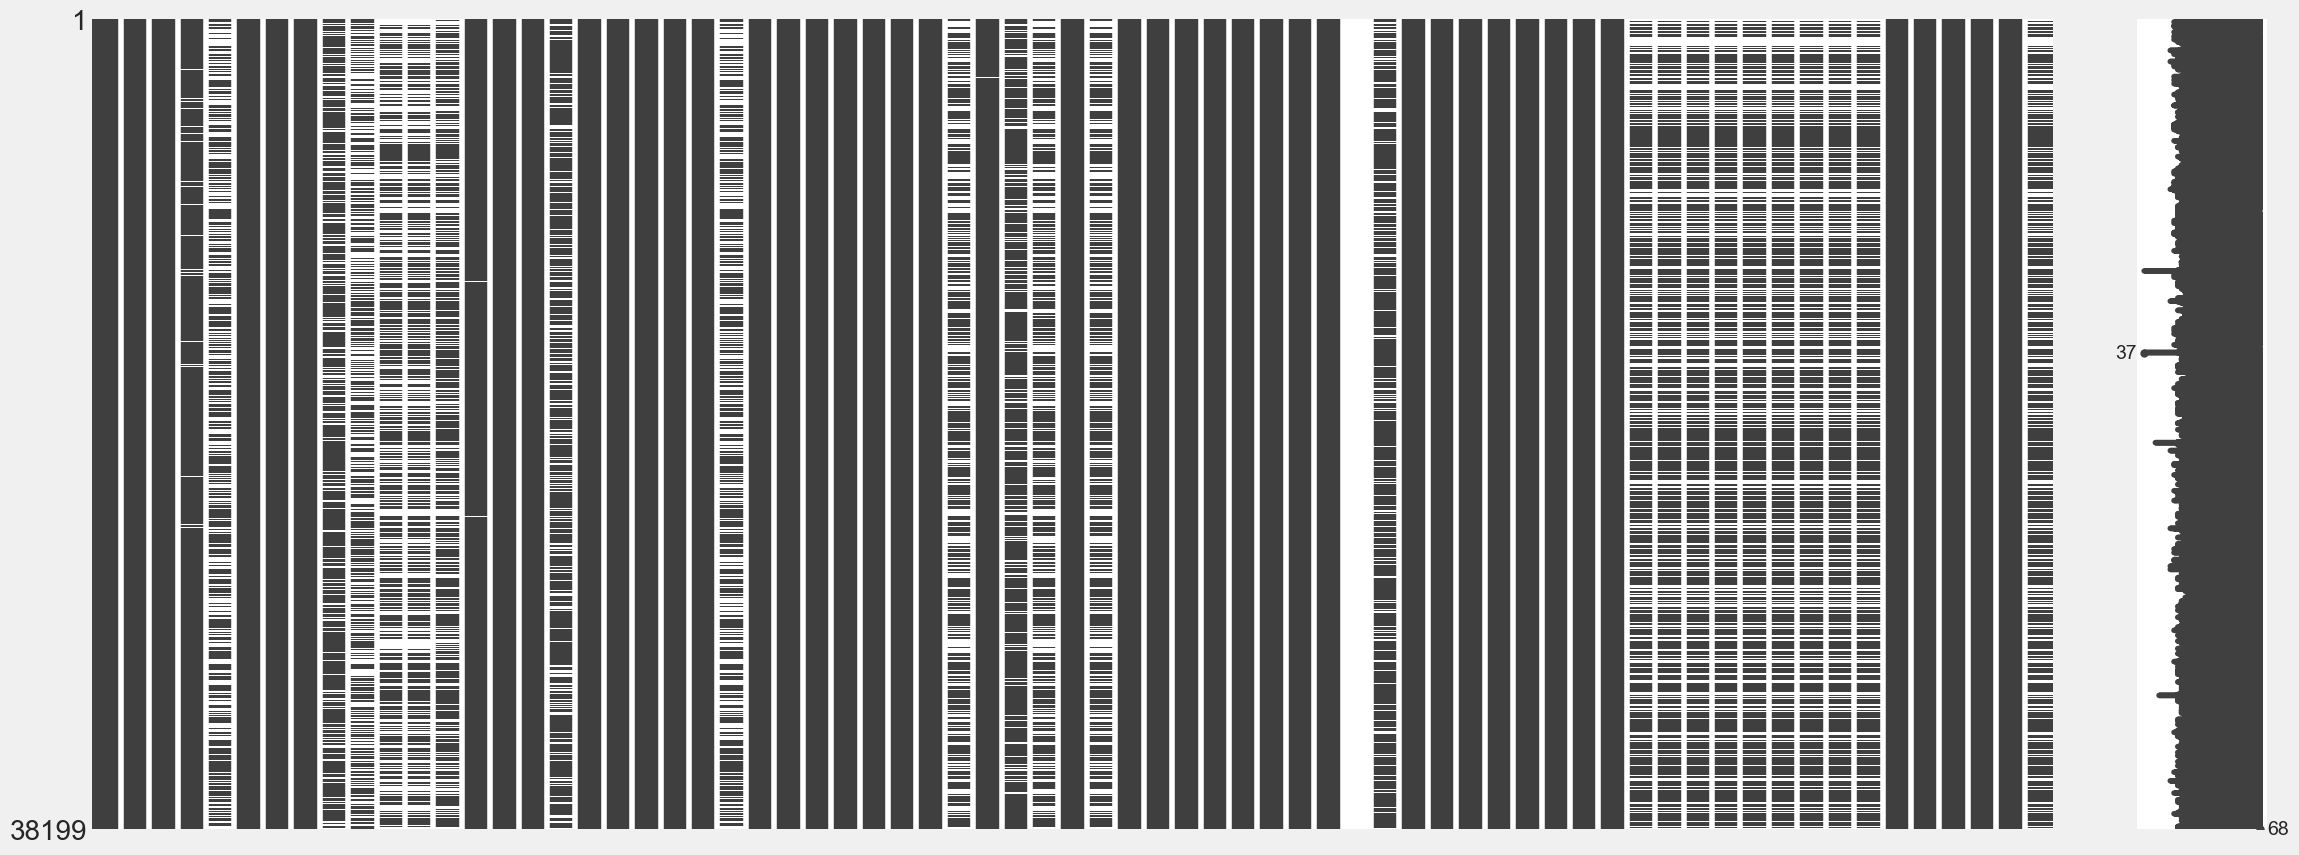

<Figure size 1200x600 with 0 Axes>

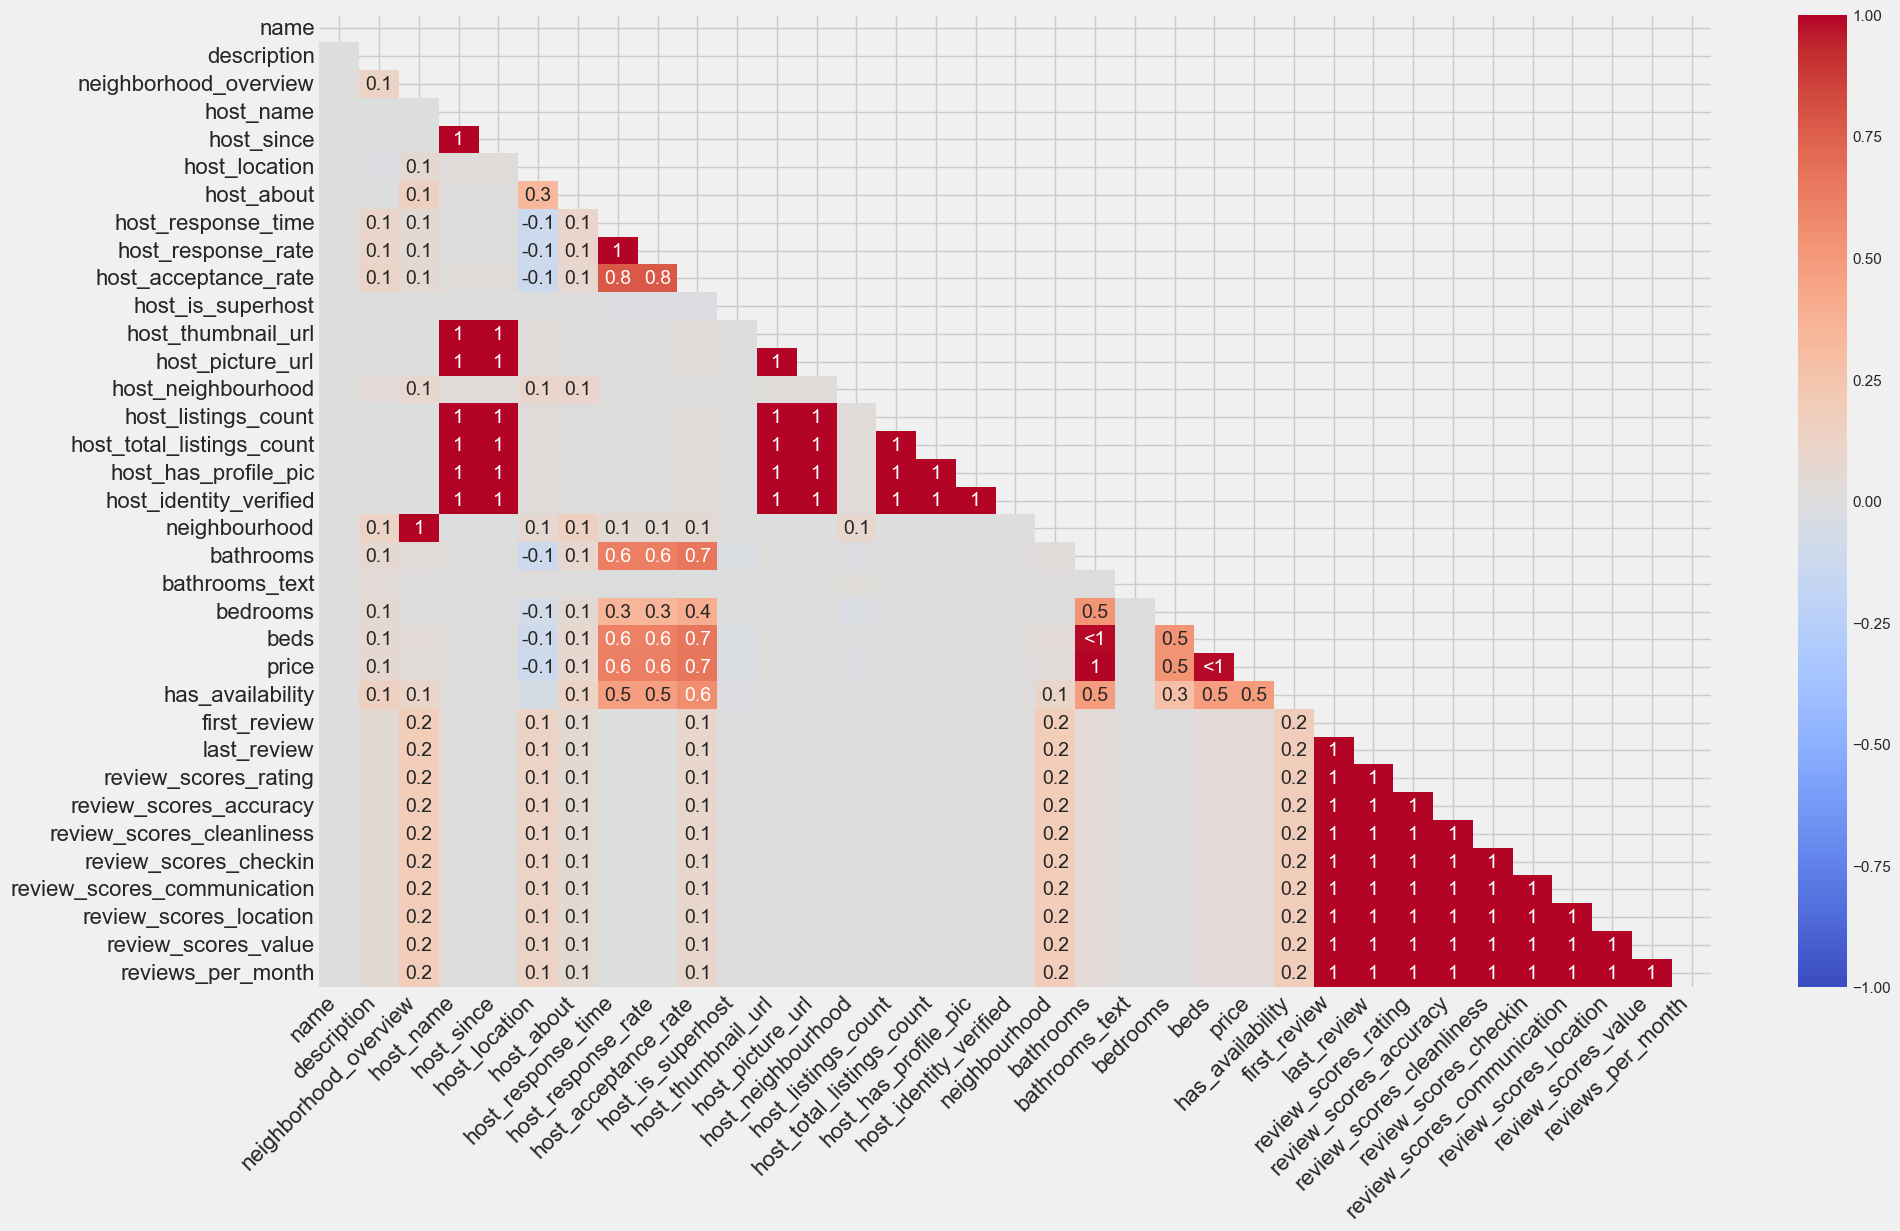

In [43]:
import missingno as msno

# Check for missing values
print("Missing values per column before cleaning:")
print(df.isnull().sum())

print('Shape of data before cleaning')
print(df.shape)

# Visualize missing data
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.show()

# Visualize the missing data as a heatmap
plt.figure(figsize=(12, 6))
msno.heatmap(df, cmap='coolwarm')
plt.show()


## Impute data


In [44]:
df['host_neighbourhood'].unique()

# Ensure the price column is treated as strings
df['price'] = df['price'].astype(str)

# Remove $ sign and convert to numeric
df['price'] = df['price'].str.replace('$', '').replace('None', 'nan')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

print("\nDataFrame after removing $ prefix and converting to numeric:")
print(df)

# Function to fill missing values with the mean within each group
def fill_with_mean(s):
    return s.fillna(s.mean())

# Apply the function to the 'price' column within each group
df['price'] = df.groupby('host_neighbourhood')['price'].transform(fill_with_mean)

print("\nDataFrame after filling missing values in 'price' with mean by host_neighbourhood:")
print(df)

# Group by host_neighbourhood and price, and count occurrences
count_df = df.groupby(['host_neighbourhood', 'price']).size().reset_index(name='count')

print("\nNumber of each host_neighbourhood by price:")
print(count_df)

/var/folders/d7/3y4pn1x55_583bts49jyqlxh0000gn/T/ipykernel_84090/3974067969.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').replace('None', 'nan')



DataFrame after removing $ prefix and converting to numeric:
      last_scraped           source  \
0       2024-05-04  previous scrape   
1       2024-05-03      city scrape   
2       2024-05-04  previous scrape   
3       2024-05-03      city scrape   
4       2024-05-04      city scrape   
...            ...              ...   
38194   2024-05-03      city scrape   
38195   2024-05-03      city scrape   
38196   2024-05-03      city scrape   
38197   2024-05-03      city scrape   
38198   2024-05-03      city scrape   

                                                    name  \
0                                      Large one bedroom   
1                          New Flushing Modern Apartment   
2                       Lovely studio in Hell's Kitchen!   
3             Luxury 1- bedroom rental unit with Hot tub   
4                              Private room close to LGA   
...                                                  ...   
38194                                    Cozy Gue

Shape of data after cleaning:
(38199, 69)
Missing values per column after cleaning:
last_scraped                                    0
source                                          0
name                                            0
description                                     0
neighborhood_overview                           0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 69, dtype: int64

Columns with all missing values:
calendar_updated
Shape of data after cleaning:
(38199, 68)


<Figure size 1200x600 with 0 Axes>

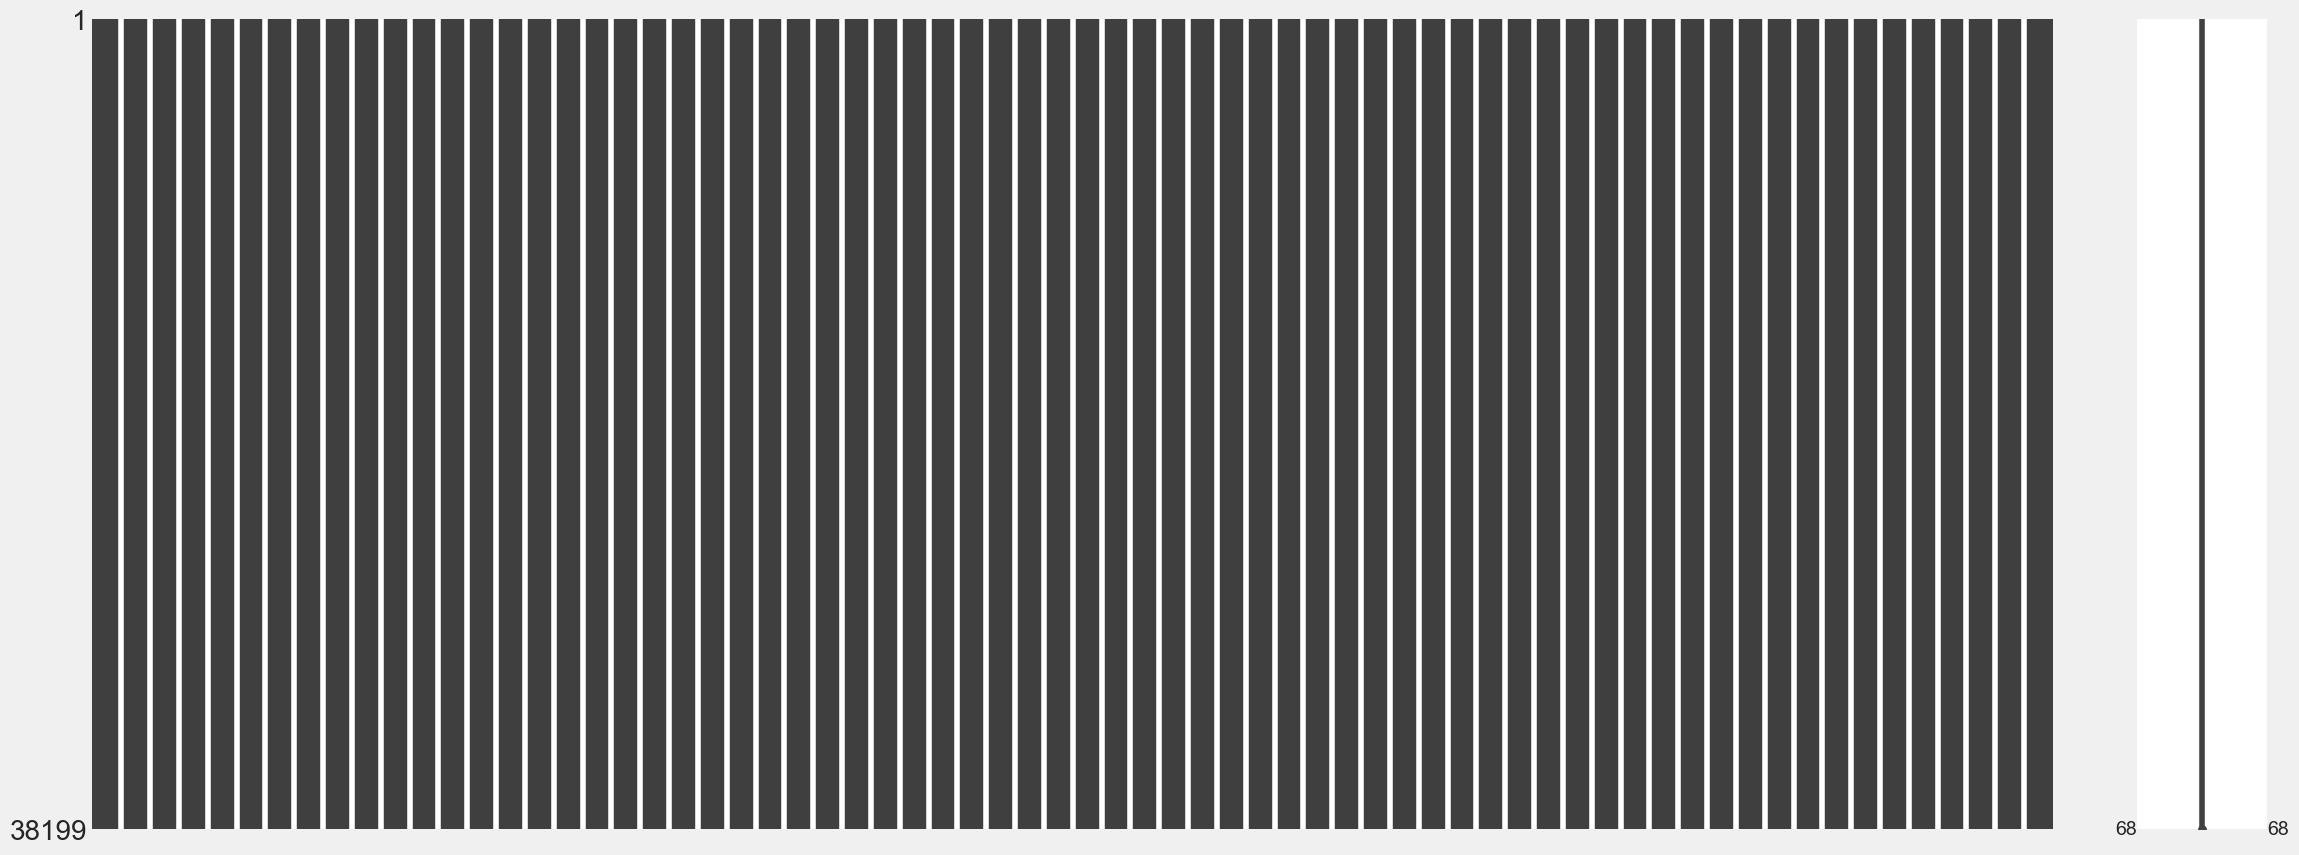

In [45]:
# Clean up whitespace or empty strings
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Replace missing values in numeric columns with mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Replace missing values in categorical columns with mode
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print('Shape of data after cleaning:')
print(df.shape)

# Check for missing values after dropping rows with missing data
print("Missing values per column after cleaning:")
print(df.isnull().sum())

# Identify columns with all missing values
columns_with_all_missing = df.columns[df.isna().all()]

# Print the names of columns with all missing values
print("\nColumns with all missing values:")
for col in columns_with_all_missing:
    print(col)

# Remove columns with all missing values
df = df.drop(columns=columns_with_all_missing)

print('Shape of data after cleaning:')
print(df.shape)

# Verify there are no more missing values with matrix plot
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.show()



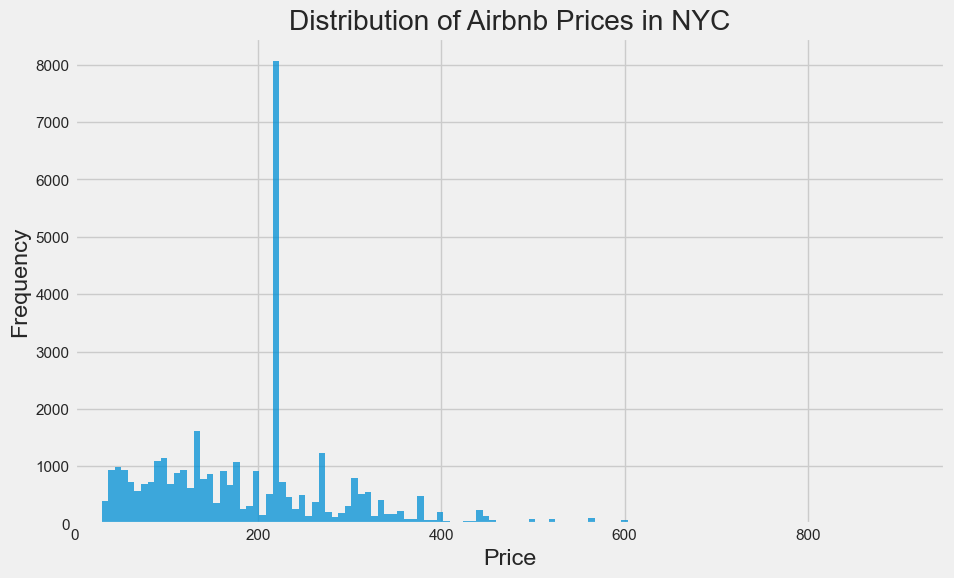

In [46]:
# Set styles for the plots
sns.set(style="whitegrid")
plt.style.use("fivethirtyeight")

# Histogram for price
plt.figure(figsize=(10, 6))
sns.histplot(df['price'])
plt.title('Distribution of Airbnb Prices in NYC')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, df['price'].quantile(0.99))  # To limit the x-axis to the 99th percentile to avoid extreme outliers
plt.show()


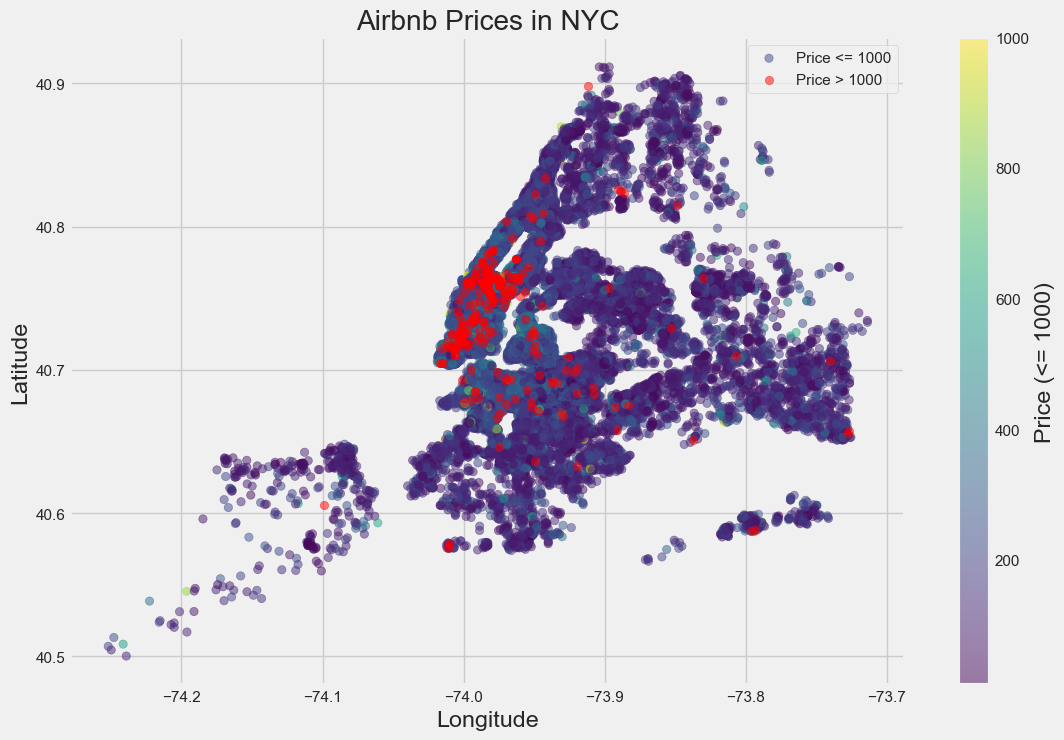

In [47]:

# Split the data into two groups
df_below_1000 = df[df['price'] <= 1000]
df_above_1000 = df[df['price'] > 1000]

# Plot the data
plt.figure(figsize=(12, 8))

# Scatter plot for prices <= 1000
sc = plt.scatter(df_below_1000['longitude'], df_below_1000['latitude'], c=df_below_1000['price'], cmap='viridis', alpha=0.5, label='Price <= 1000')

# Scatter plot for prices > 1000
plt.scatter(df_above_1000['longitude'], df_above_1000['latitude'], color='red', alpha=0.5, label='Price > 1000')

# Add color bar for the price <= 1000 points
cbar = plt.colorbar(sc, label='Price (<= 1000)')

# Add titles and labels
plt.title('Airbnb Prices in NYC')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

The plot above shows the scatter plot of the price vs latitude-longitude. The prices above $1000 are marked by red.

/var/folders/d7/3y4pn1x55_583bts49jyqlxh0000gn/T/ipykernel_84090/755991337.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


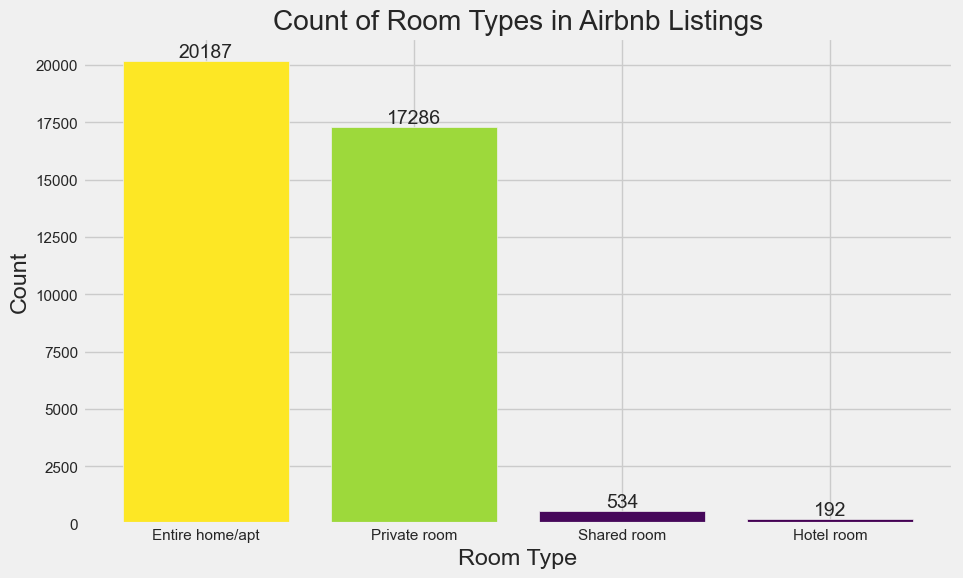

In [48]:
import matplotlib.cm as cm

# Count the occurrences of each room type
room_type_counts = df['room_type'].value_counts()

# Get the viridis colormap
cmap = cm.get_cmap('viridis')

# Normalize the color range
norm = plt.Normalize(room_type_counts.min(), room_type_counts.max())
colors = cmap(norm(room_type_counts.values))

# Plot the counts
plt.figure(figsize=(10, 6))
plt.bar(room_type_counts.index, room_type_counts.values, color=colors)

# Add titles and labels
plt.title('Count of Room Types in Airbnb Listings')
plt.xlabel('Room Type')
plt.ylabel('Count')

# Add value labels on the bars
for index, value in enumerate(room_type_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

In [49]:
# # Count the occurrences of each neighborhood group
# neighborhood_group_counts = df['neighbourhood_group'].value_counts()

# # Plot the counts
# plt.figure(figsize=(10, 6))
# plt.bar(neighborhood_group_counts.index, neighborhood_group_counts.values, color='skyblue')

# # Add titles and labels
# plt.title('Count of Neighborhood Groups in Airbnb Listings')
# plt.xlabel('Neighborhood Group')
# plt.ylabel('Count')

# # Add value labels on the bars
# for index, value in enumerate(neighborhood_group_counts.values):
#     plt.text(index, value, str(value), ha='center', va='bottom')

# plt.show()


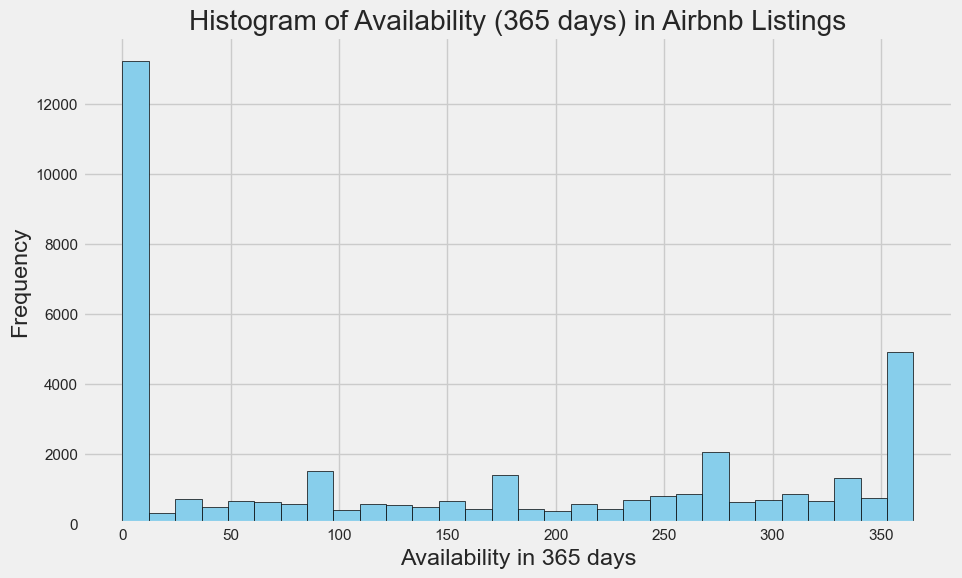

In [50]:
# Plot the histogram for availability_365
plt.figure(figsize=(10, 6))
plt.hist(df['availability_365'], bins=30, edgecolor='black', color='skyblue')

# Add titles and labels
plt.title('Histogram of Availability (365 days) in Airbnb Listings')
plt.xlabel('Availability in 365 days')
plt.ylabel('Frequency')

plt.show()

In [51]:
df.describe()

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,38199.000000,38199.000000,38199.000000,38199.000000,38199.000000,38199.000000,38199.000000,38199.000000,38199.000000,38199.000000,...,38199.000000,38199.000000,38199.000000,38199.000000,38199.000000,38199.000000,38199.000000,38199.000000,38199.000000,38199.000000
mean,171.067890,233.853014,40.729102,-73.946787,2.795387,1.198337,1.387918,1.513580,216.699830,29.164900,...,4.661324,4.835227,4.832203,4.745983,4.655192,48.116050,24.795126,22.877667,0.069400,0.914669
std,752.594484,930.471648,0.056536,0.054508,1.958980,0.439089,0.860244,1.019499,783.842905,30.315807,...,0.405675,0.300149,0.322795,0.313153,0.381966,153.920473,123.813710,96.030008,0.577404,1.288781
min,1.000000,1.000000,40.500314,-74.251907,1.000000,0.000000,0.000000,0.000000,8.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.000000,1.000000,40.688630,-73.983120,2.000000,1.000000,1.000000,1.000000,112.240602,30.000000,...,4.661324,4.835227,4.832203,4.745983,4.655192,1.000000,0.000000,0.000000,0.000000,0.180000
50%,2.000000,3.000000,40.726390,-73.954330,2.000000,1.198337,1.000000,1.513580,201.247126,30.000000,...,4.661324,4.835227,4.850000,4.745983,4.655192,1.000000,1.000000,1.000000,0.000000,0.914669
75%,8.000000,12.000000,40.762669,-73.927680,4.000000,1.198337,1.387918,1.513580,233.000000,30.000000,...,4.910000,5.000000,5.000000,4.950000,4.850000,7.000000,2.000000,2.000000,0.000000,0.914669
max,4818.000000,8954.000000,40.911390,-73.713650,16.000000,15.500000,16.000000,42.000000,100000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,837.000000,837.000000,659.000000,13.000000,58.480000


# Regression

The regression is performed based on the following steps

1. Outlier removal (histogram, boxplot)
2. XGBoost with default hyperparameters (gives R2-score of 0.16)
3. XGBoost with grid search for hyperparameters (gives R2-score of 0.49 - best)
4. Random Forest with grid search for hyperparameters (gives R2-score of 0.46)
5. Random Forest based on important features (gives R2-score of 0.31)
6. Random Forest with PCA based on best parameters from step 4 (gives R2-score of 0.08)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Ensure the price column is treated as strings
df['price'] = df['price'].astype(str)

# Remove $ sign and convert to numeric, handling 'None' and other non-numeric values
df['price'] = df['price'].str.replace('$', '').replace('None', 'nan').replace('', 'nan')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

print("\nDataFrame after removing $ prefix and converting to numeric:")
print(df)

# Function to fill missing values with the mean within each group
def fill_with_mean(s):
    return s.fillna(s.mean())

# Apply the function to the 'price' column within each group
df['price'] = df.groupby('host_neighbourhood')['price'].transform(fill_with_mean)

print("\nDataFrame after filling missing values in 'price' with mean by host_neighbourhood:")
print(df)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Exclude 'host_neighbourhood' from categorical columns to be dropped
categorical_cols = [col for col in categorical_cols if col != 'host_neighbourhood']

# Drop the remaining categorical columns
df = df.drop(columns=categorical_cols)

# Encode 'host_neighbourhood' column
le = LabelEncoder()
df['host_neighbourhood'] = le.fit_transform(df['host_neighbourhood'])

print("\nDataFrame after encoding 'host_neighbourhood':")
print(df)

# Ensure all data is numeric
print(df.dtypes)

# Define features and target
X = df.drop('price', axis=1)
y = df['price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nTraining and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

/var/folders/d7/3y4pn1x55_583bts49jyqlxh0000gn/T/ipykernel_84090/381054120.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '').replace('None', 'nan').replace('', 'nan')



DataFrame after removing $ prefix and converting to numeric:
       host_neighbourhood  host_listings_count  host_total_listings_count  \
0         Upper East Side                  1.0                        1.0   
1                Woodside                  6.0                       17.0   
2      Bedford-Stuyvesant                  1.0                        1.0   
3                 Jamaica                  1.0                        1.0   
4                Flushing                  3.0                        5.0   
...                   ...                  ...                        ...   
38194        Coney Island                  1.0                        1.0   
38195           Todt Hill                  2.0                        3.0   
38196       The Rockaways                  2.0                        2.0   
38197  Bedford-Stuyvesant                  1.0                        9.0   
38198             Jamaica                  4.0                        4.0   

        latit

## Removal of outliers

array([[<Axes: title={'center': 'host_neighbourhood'}>,
        <Axes: title={'center': 'host_listings_count'}>,
        <Axes: title={'center': 'host_total_listings_count'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'accommodates'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'maximum_nights'}>],
       [<Axes: title={'center': 'minimum_minimum_nights'}>,
        <Axes: title={'center': 'maximum_minimum_nights'}>,
        <Axes: title={'center': 'minimum_maximum_nights'}>,
        <Axes: title={'center': 'maximum_maximum_nights'}>,
        <Axes: title={'center': 'minimum_nights_avg_ntm'}>,
        <Axes: title={'center': 'maximum_nights_avg_ntm'}>],
       [<Axes: title={'center': 'ava

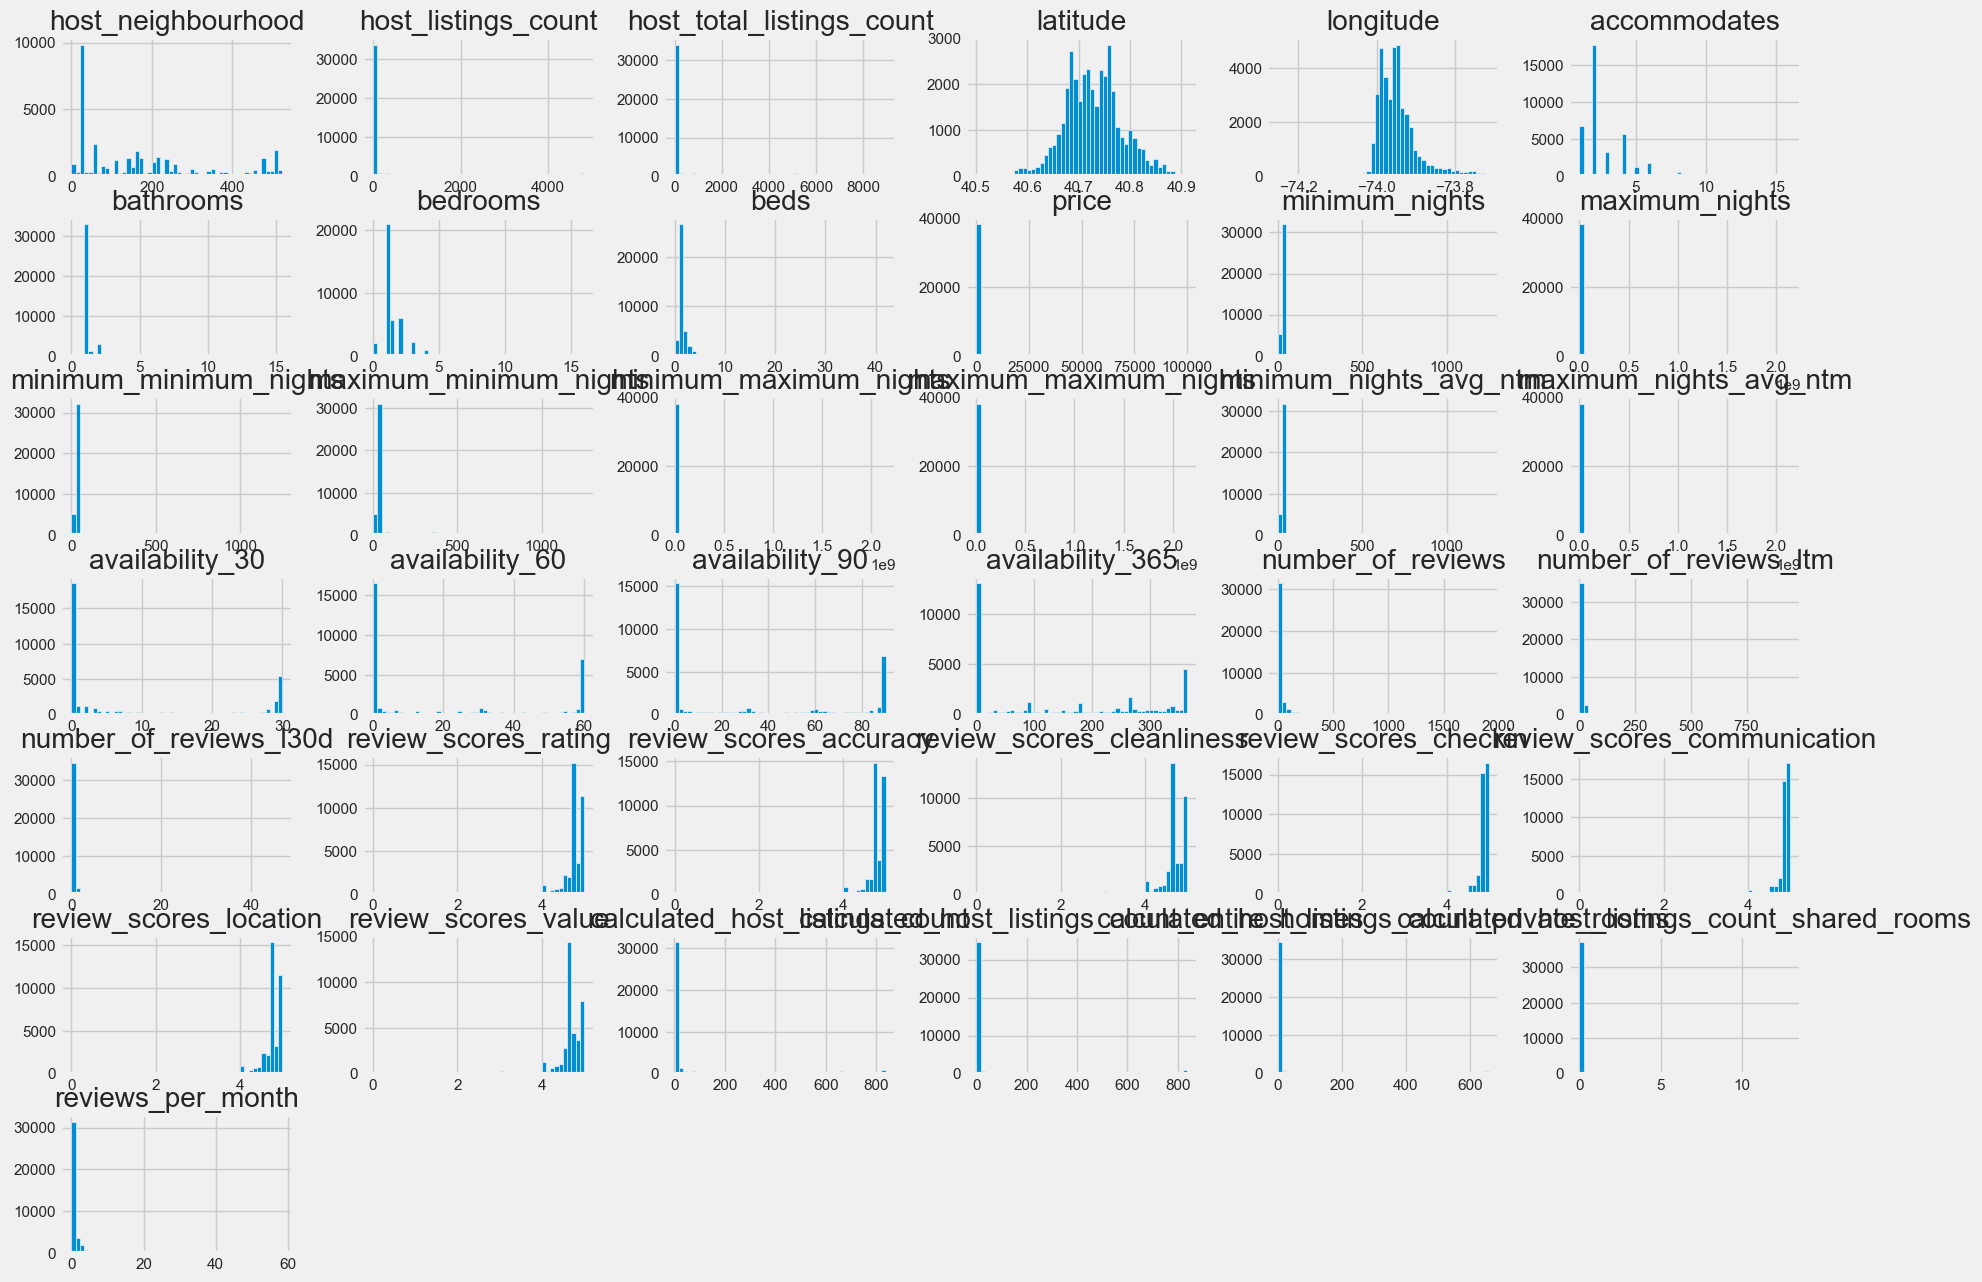

In [56]:
df.describe()
df.hist(bins=50, figsize=(20, 15))

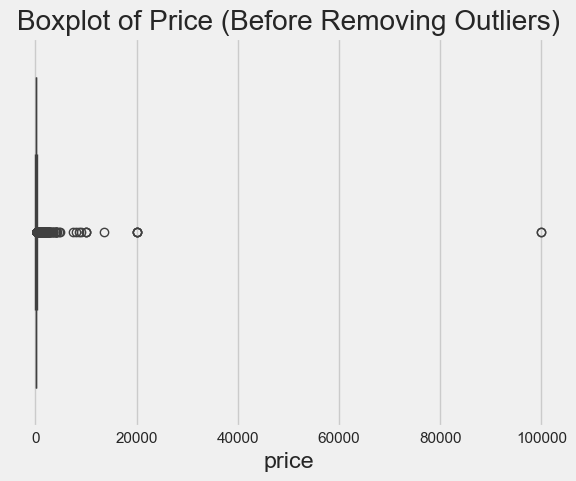

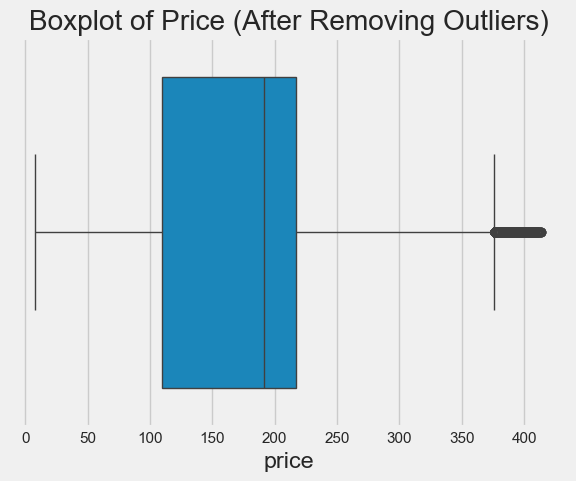

Original number of rows: 38199
Number of rows after removing outliers: 36336


In [57]:
# Create Boxplot before removing outliers
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price (Before Removing Outliers)')
plt.show()

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Create Boxplot after removing outliers
sns.boxplot(x=df_filtered['price'])
plt.title('Boxplot of Price (After Removing Outliers)')
plt.show()

print(f'Original number of rows: {len(df)}')
print(f'Number of rows after removing outliers: {len(df_filtered)}')

df = df_filtered

# Define features and target
X = df.drop('price', axis=1)
y = df['price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [58]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm
import numpy as np

# Initialize the XGBoost regressor with default parameters
model = xgb.XGBRegressor()

# Function to fit the model with progress bar
def fit_with_progress(estimator, X, y, batch_size=5):
    n_samples = X.shape[0]
    n_batches = int(np.ceil(n_samples / batch_size))
    
    progress_bar = tqdm(total=n_batches, desc="Training Progress")
    
    for i in range(n_batches):
        start = i * batch_size
        end = min(start + batch_size, n_samples)
        estimator.fit(X[start:end], y[start:end], xgb_model=None, eval_metric='rmse', verbose=False)
        progress_bar.update(1)
    
    progress_bar.close()

# Function to predict with progress bar
def predict_with_progress(estimator, X, batch_size=100):
    n_samples = X.shape[0]
    n_batches = int(np.ceil(n_samples / batch_size))
    y_pred = np.zeros(n_samples)
    
    progress_bar = tqdm(total=n_batches, desc="Prediction Progress")
    
    for i in range(n_batches):
        start = i * batch_size
        end = min(start + batch_size, n_samples)
        y_pred[start:end] = estimator.predict(X[start:end])
        progress_bar.update(1)
    
    progress_bar.close()
    return y_pred

# Assuming X_train, X_test, y_train, and y_test are already defined
# Train the XGBoost model with progress bar
fit_with_progress(model, X_train, y_train)

# Make predictions with progress bar
y_pred = predict_with_progress(model, X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')


Training Progress:   0%|                               | 0/5814 [00:00<?, ?it/s]/opt/anaconda3/envs/tf2/lib/python3.8/site-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
Prediction Progress: 100%|████████████████████| 73/73 [00:00<00:00, 1627.47it/s]

MAE: 96.6833783442566
MSE: 13977.474115972087
R-squared: -0.8551109491690412


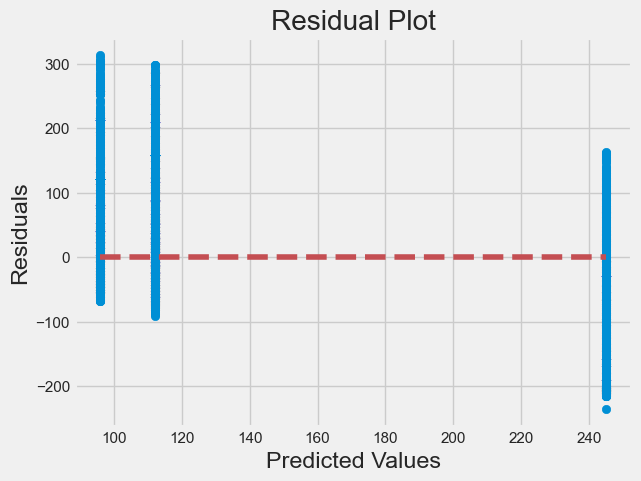

In [59]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


['f237', 'f2', 'f7', 'f149', 'f5', 'f6', 'f3', 'f4', 'f1', 'f0']


<Figure size 1500x1500 with 0 Axes>

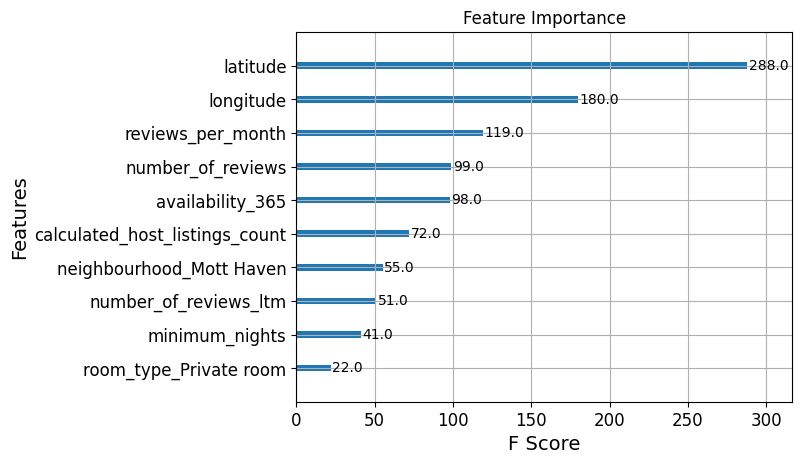

In [12]:
# Get the feature names
feature_names = df.drop('price', axis=1).columns

# Extract feature importances
booster = model.get_booster()
importance = booster.get_score(importance_type='weight')

# Create a mapping from feature index to feature name
feature_map = {f'f{index}': name for index, name in enumerate(feature_names)}

# Sort the features by importance
sorted_importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)

# Plot feature importance with a larger figure size
plt.figure(figsize=(15, 15))
ax = xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.title('Feature Importance')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Features', fontsize=14)
plt.xlabel('F Score', fontsize=14)

# Extract the default y-tick labels
ytick_labels = [label.get_text() for label in ax.get_yticklabels()]

print(ytick_labels)

# Convert the default labels to the correct feature names
ytick_labels = [feature_map[label] for label in ytick_labels]

# Set the y-tick labels to the feature names
ax.set_yticklabels(ytick_labels)

plt.show()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
MAE: 44.41180803250616
MSE: 3831.962267062205
R-squared: 0.49052643497315185


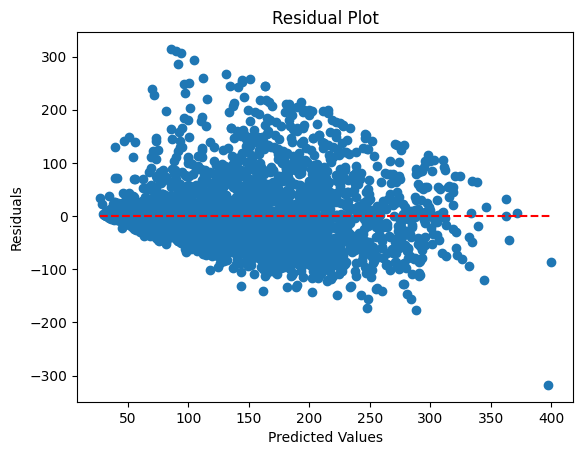

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV with verbose output
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', verbose=3, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
plt.show()

## Random Forest

Prediction Progress: 100%|██████████████████████| 73/73 [00:01<00:00, 69.42it/s]


MAE: 40.64328926865236
MSE: 3308.025760659671
R-squared: 0.5504818489691928
Best Parameters: {'bootstrap': True, 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


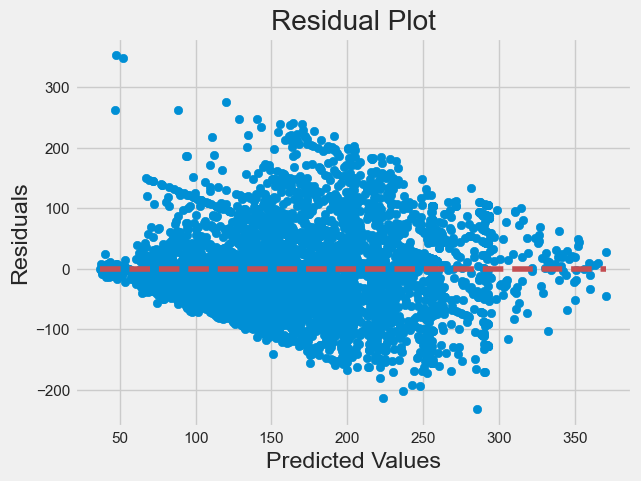

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm
from sklearn.decomposition import PCA



# Apply PCA to the standardized features
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6],
    'bootstrap': [True]
}

# Initialize the RandomForestRegressor
model = RandomForestRegressor(random_state=0)

# Get all parameter combinations
param_list = list(ParameterGrid(param_grid))
n_combinations = len(param_list)

# Progress bar
progress_bar = tqdm(total=n_combinations, desc="Grid Search Progress")

# Variables to store the best results
best_score = -np.inf
best_params = None
best_model = None

# Perform grid search manually
for params in param_list:
    model.set_params(**params)
    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
    mean_score = scores.mean()
    
    # Update the best model if the current one is better
    if mean_score > best_score:
        best_score = mean_score
        best_params = params
        best_model = model
    
    progress_bar.update(1)

progress_bar.close()

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions with progress bar
def predict_with_progress(estimator, X, batch_size=100):
    n_samples = X.shape[0]
    n_batches = int(np.ceil(n_samples / batch_size))
    y_pred = np.zeros(n_samples)
    
    progress_bar = tqdm(total=n_batches, desc="Prediction Progress")
    
    for i in range(n_batches):
        start = i * batch_size
        end = min(start + batch_size, n_samples)
        y_pred[start:end] = estimator.predict(X[start:end])
        progress_bar.update(1)
    
    progress_bar.close()
    return y_pred

# Make predictions with progress bar
y_pred = predict_with_progress(best_model, X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')
print(f'Best Parameters: {best_params}')

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [22]:
# Best hyperparameters from grid search
best_params

{'bootstrap': True,
 'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

## Random Forest Regression based on Important features

In [23]:
# Extract feature importances
feature_importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# Select top N features (for example, top 10 features)
top_n = 10
top_features = importance_df['Feature'].head(top_n).values

# Alternatively, you can select features with importance above a certain threshold
# threshold = 0.01
# top_features = importance_df[importance_df['Importance'] > threshold]['Feature'].values

print(f"Top {top_n} features: {top_features}")

# Subset the data to include only the selected top features
X_train_selected = X_train[:, importance_df['Feature'].isin(top_features)]
X_test_selected = X_test[:, importance_df['Feature'].isin(top_features)]

# Train a new Random Forest model using the selected features
best_model.fit(X_train_selected, y_train)

# Make predictions and evaluate the new model
y_pred_selected = best_model.predict(X_test_selected)

mae_selected = mean_absolute_error(y_test, y_pred_selected)
mse_selected = mean_squared_error(y_test, y_pred_selected)
r2_selected = r2_score(y_test, y_pred_selected)

print(f"MAE (selected features): {mae_selected}")
print(f"MSE (selected features): {mse_selected}")
print(f"R-squared (selected features): {r2_selected}")

                            Feature  Importance
237          room_type_Private room    0.401452
2                    minimum_nights    0.207572
5    calculated_host_listings_count    0.105396
1                         longitude    0.090274
0                          latitude    0.056550
..                              ...         ...
26          neighbourhood_Bellerose    0.000000
121   neighbourhood_Jamaica Estates    0.000000
122     neighbourhood_Jamaica Hills    0.000000
25       neighbourhood_Belle Harbor    0.000000
139           neighbourhood_Melrose    0.000000

[239 rows x 2 columns]
Top 10 features: ['room_type_Private room' 'minimum_nights'
 'calculated_host_listings_count' 'longitude' 'latitude'
 'availability_365' 'room_type_Shared room' 'number_of_reviews'
 'reviews_per_month' 'neighbourhood_group_Manhattan']
MAE (selected features): 55.06572433902129
MSE (selected features): 5167.7753435798495
R-squared (selected features): 0.3129251427702716


## PCA

Prediction Progress: 100%|██████████████████████| 31/31 [00:00<00:00, 63.04it/s]


MAE: 46.29192654477704
MSE: 3636.7677513069257
R-squared: 0.41916490347310464
Best Parameters: {'bootstrap': True, 'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


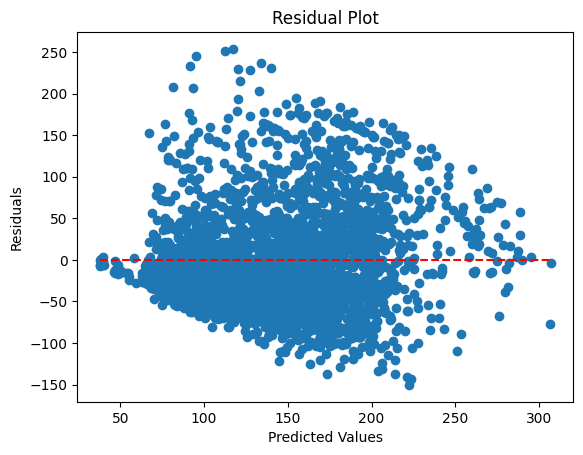

In [12]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tqdm import tqdm

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to the standardized features
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6],
    'bootstrap': [True]
}

# Initialize the RandomForestRegressor
model = RandomForestRegressor(random_state=0)

# Get all parameter combinations
param_list = list(ParameterGrid(param_grid))
n_combinations = len(param_list)

# Progress bar
progress_bar = tqdm(total=n_combinations, desc="Grid Search Progress")

# Variables to store the best results
best_score = -np.inf
best_params = None
best_model = None

# Perform grid search manually
for params in param_list:
    model.set_params(**params)
    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)
    mean_score = scores.mean()
    
    # Update the best model if the current one is better
    if mean_score > best_score:
        best_score = mean_score
        best_params = params
        best_model = model
    
    progress_bar.update(1)

progress_bar.close()

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Make predictions with progress bar
def predict_with_progress(estimator, X, batch_size=100):
    n_samples = X.shape[0]
    n_batches = int(np.ceil(n_samples / batch_size))
    y_pred = np.zeros(n_samples)
    
    progress_bar = tqdm(total=n_batches, desc="Prediction Progress")
    
    for i in range(n_batches):
        start = i * batch_size
        end = min(start + batch_size, n_samples)
        y_pred[start:end] = estimator.predict(X[start:end])
        progress_bar.update(1)
    
    progress_bar.close()
    return y_pred

# Make predictions with progress bar
y_pred = predict_with_progress(best_model, X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R-squared: {r2}')
print(f'Best Parameters: {best_params}')

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## SVM Regressor

In [24]:
# from sklearn.svm import SVR
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from tqdm import tqdm
# import numpy as np

# # Parameter grid for SVR
# param_grid = {
#     'C': [0.1, 1, 10],
#     'epsilon': [0.01, 0.1, 1],
#     'kernel': ['linear', 'poly', 'rbf']
# }

# # Initialize the SVR model
# model = SVR()

# # Function to fit the model with progress bar
# def fit_with_progress(grid_search, X, y, batch_size=100):
#     n_samples = X.shape[0]
#     n_batches = int(np.ceil(n_samples / batch_size))
    
#     progress_bar = tqdm(total=n_batches, desc="Training Progress")
    
#     for i in range(n_batches):
#         start = i * batch_size
#         end = min(start + batch_size, n_samples)
#         grid_search.fit(X[start:end], y[start:end])
#         progress_bar.update(1)
    
#     progress_bar.close()

# # Function to predict with progress bar
# def predict_with_progress(estimator, X, batch_size=100):
#     n_samples = X.shape[0]
#     n_batches = int(np.ceil(n_samples / batch_size))
#     y_pred = np.zeros(n_samples)
    
#     progress_bar = tqdm(total=n_batches, desc="Prediction Progress")
    
#     for i in range(n_batches):
#         start = i * batch_size
#         end = min(start + batch_size, n_samples)
#         y_pred[start:end] = estimator.predict(X[start:end])
#         progress_bar.update(1)
    
#     progress_bar.close()
#     return y_pred

# # Grid search with SVR model
# grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=0)

# # Train the SVR model with grid search and progress bar
# fit_with_progress(grid_search, X_train, y_train)

# # Make predictions with progress bar
# y_pred = predict_with_progress(grid_search.best_estimator_, X_test)

# # Evaluate the model
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'MAE: {mae}')
# print(f'MSE: {mse}')
# print(f'R-squared: {r2}')
# print(f'Best Parameters: {grid_search.best_params_}')


In [107]:
# from sklearn.svm import SVR
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.model_selection import GridSearchCV
# from tqdm import tqdm
# import numpy as np

# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'C': [0.1, 1, 10],
#     'epsilon': [0.1, 0.2, 0.5]
# }

# # Initialize the SVR model
# svr = SVR()

# # Calculate the total number of fits
# n_candidates = len(param_grid['kernel']) * len(param_grid['C']) * len(param_grid['epsilon'])
# total_fits = n_candidates * 5  # 5 is the number of cross-validation folds

# # Custom callback to track progress
# class TqdmProgressCallback:
#     def __init__(self, total):
#         self.progress_bar = tqdm(total=total, desc="GridSearch Progress")

#     def __call__(self, fit_params):
#         self.progress_bar.update(1)

#     def close(self):
#         self.progress_bar.close()

# # Initialize GridSearchCV with SVR and the parameter grid
# grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=0)

# # Fit GridSearchCV with progress tracking
# def fit_with_progress(grid_search, X_train, y_train, total_fits):
#     progress_callback = TqdmProgressCallback(total_fits)

#     # Wrap the fit method to include the progress callback
#     def _fit_and_score(*args, **kwargs):
#         result = original_fit_and_score(*args, **kwargs)
#         progress_callback()
#         return result

#     # Replace the original _fit_and_score method
#     from sklearn.model_selection._validation import _fit_and_score as original_fit_and_score
#     grid_search._fit_and_score = _fit_and_score

#     # Fit the GridSearchCV
#     grid_search.fit(X_train, y_train)
#     progress_callback.close()

# # Fit GridSearchCV to find the best parameters with progress bar
# fit_with_progress(grid_search, X_train, y_train, total_fits)

# # Train the SVR model with the best parameters
# best_model = grid_search.best_estimator_
# best_model.fit(X_train, y_train)

# # Make predictions
# y_pred = best_model.predict(X_test)

# # Evaluate the model
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'MAE: {mae}')
# print(f'MSE: {mse}')
# print(f'R-squared: {r2}')
